In [1]:
import pandas as pd
import numpy as np


In [2]:
d_tr = pd.read_csv('aug_train.csv')
d_te = pd.read_csv('aug_test.csv')

In [3]:
d_tr.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
d_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
d_tr.duplicated().sum()

0

In [6]:
d_tr.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/satyam/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

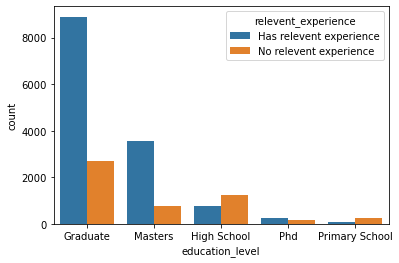

In [8]:
sns.countplot(d_tr['education_level'], hue=d_tr['relevent_experience'])

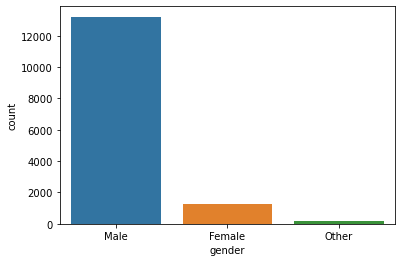

In [9]:
plt.figure()
sns.countplot(x=d_tr['gender'])
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

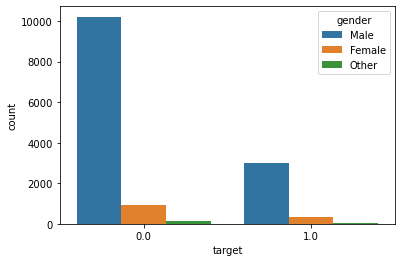

In [10]:
sns.countplot(x=d_tr['target'], hue=d_tr['gender'])

In [11]:
for item in d_tr:
    if d_tr[item].dtype == 'object':
        print(item,d_tr[item].unique())

city ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'
 'city_77' 'city_81' 'city_131' 'city_44' 'city

In [13]:
from sklearn.impute import SimpleImputer
for i in d_tr:
    if d_tr[i].isna().sum()>0:
        imr = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        imr = imr.fit(d_tr[[i]])
        imputed_data = imr.transform(d_tr[[i]])
        d_tr[i] = imputed_data

In [14]:
from sklearn.preprocessing import LabelEncoder
for c in d_tr.columns:
    le = LabelEncoder()
    if d_tr.dtypes[c] == object:
        le.fit(d_tr[c].astype(str))
        d_tr[c] = le.transform(d_tr[c].astype(str))

In [15]:
y = d_tr['target']
X = d_tr.drop(['target','enrollee_id'],axis=1)
print(y.value_counts())

0.0    14381
1.0     4777
Name: target, dtype: int64


In [16]:
from sklearn import preprocessing
nor = preprocessing.StandardScaler()
ndf = nor.fit_transform(X)
X = pd.DataFrame(ndf,index=X.index,columns=X.columns)
X.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,1.219489,0.361261,0.393556,-0.902189,-0.488985
1,0.925077,-0.428410,0.204235,1.603202,0.568358,-0.692508,0.296787,-1.050773,0.361261,0.393556,1.164364,-0.305825
2,0.558499,-1.660590,0.204235,1.603202,-1.931321,-0.692508,0.296787,0.311384,0.361261,0.393556,1.681003,0.293607
3,-0.851418,-0.323026,0.204235,1.603202,0.568358,-0.692508,-3.909499,1.068138,0.361261,0.393556,1.681003,-0.222571
4,0.163722,-0.501368,0.204235,-0.623752,0.568358,1.315676,0.296787,1.219489,0.361261,-2.690501,0.647726,-0.955209
5,0.361110,-0.525687,0.204235,-0.623752,-0.681482,-0.692508,0.296787,-1.656176,0.361261,0.393556,-0.902189,-0.688795
6,0.135524,0.738919,0.204235,-0.623752,0.568358,0.311584,0.296787,0.311384,0.361261,-2.690501,-0.902189,-0.688795
7,1.094267,-0.541900,0.204235,-0.623752,0.568358,-0.692508,0.296787,-1.353475,2.043168,0.393556,1.164364,-0.788700
8,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,0.614085,0.361261,0.393556,-0.902189,-0.322476
9,-1.105203,0.738919,0.204235,-0.623752,0.568358,-0.692508,0.296787,-0.748072,-0.199374,0.393556,1.164364,0.959642


In [17]:
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X,y)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X_resampled,y_resampled,train_size=0.7, random_state=1)

In [19]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
params = {
    'learning_rate': [0.05],
    'num_leaves': [90,140,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [3,4,5,6,7,8],
    'random_state' : [42], 
    'colsample_bytree' : [0.5,0.6,0.7,0.8,1.0],
    'subsample' : [0.5,0.6,0.7,0.8,1.0],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['auc']
    }
clf = lgb.LGBMClassifier()
RSCV = RandomizedSearchCV(clf,params,verbose=3,cv=10,n_jobs = -1,n_iter=12)
RSCV.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


RandomizedSearchCV(cv=10, estimator=LGBMClassifier(), n_iter=12, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             1.0],
                                        'learning_rate': [0.05],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'metric': ['auc'],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 140, 200],
                                        'objective': ['binary'],
                                        'random_state': [42],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 1.0]},
                   verbose=3)

In [20]:
y_pred=RSCV.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      4345
         1.0       0.82      0.84      0.83      4235

    accuracy                           0.83      8580
   macro avg       0.83      0.83      0.83      8580
weighted avg       0.83      0.83      0.83      8580



In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8284382284382285